In [ ]:
%matplotlib inline

# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [2]:
import matplotlib.pyplot as plt
import fastf1.plotting


fastf1.Cache.enable_cache('../doc_cache')  # replace with your cache directory

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v2.3.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	No cached data found for car_data. Loading data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for position_data. Loading data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Data has been written to cache!
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished

First, we select the two laps that we want to compare



In [3]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [4]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



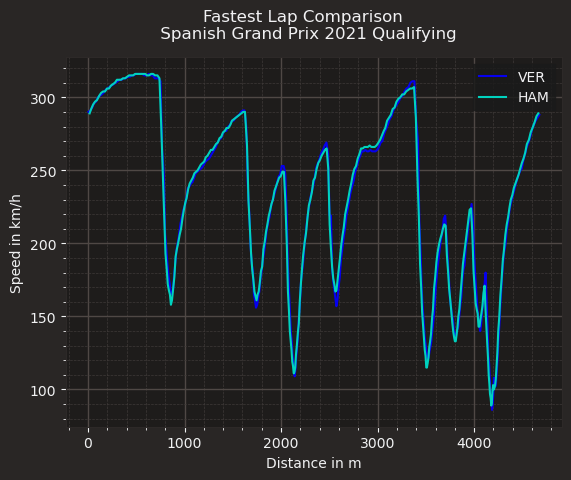

In [5]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()